In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
customer_df = pd.read_csv('../data/Customer Churn.csv')
customer_df

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0
1,0,0,39,318,5,7,4,0,0
2,10,0,37,2453,60,359,24,1,0
3,10,0,38,4198,66,1,35,1,0
4,3,0,38,2393,58,2,33,1,0
...,...,...,...,...,...,...,...,...,...
3145,21,0,19,6697,147,92,44,1,0
3146,17,0,17,9237,177,80,42,1,0
3147,13,0,18,3157,51,38,21,1,0
3148,7,0,11,4695,46,222,12,1,0


In [3]:
y = customer_df['Churn']
Xs = customer_df.drop(columns=['Churn'])

In [4]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50, 60],
    'min_samples_split': [10, 20, 30, 40, 50],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01, 0.05, 0.1]
}

customer_df_rs = customer_df.sample(1000,random_state=1)
y=customer_df_rs['Churn']
Xs = customer_df_rs.drop(columns=['Churn'])

gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid, cv=3, 
                          scoring='recall',verbose=1)
gridSearch.fit(Xs, y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Initial score:  0.7430555555555555
Initial parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}


In [5]:
from sklearn.tree import export_graphviz
import graphviz

In [6]:
y=customer_df['Churn']
Xs = customer_df.drop(columns=['Churn'])

classTree = DecisionTreeClassifier(criterion= 'entropy', 
                                   max_depth= 10,
                                   min_samples_split= 10,
                                   min_impurity_decrease= 
                                   0.005)
classTree.fit(Xs, y)

dot_data = export_graphviz(classTree, 
                           out_file=None, 
                           feature_names=Xs.columns,  
                           class_names=['Not Churn',
                                        'Churn'], 
                           filled=True,
                           rounded=True, 
                           special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render(filename='ChurnDT')

'ChurnDT.pdf'

In [7]:
customer_df.Churn.value_counts(normalize=True)

Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
y=customer_df['Churn']
Xs = customer_df.drop(columns=['Churn'])

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

RandomForestClassifier(n_estimators=1000)

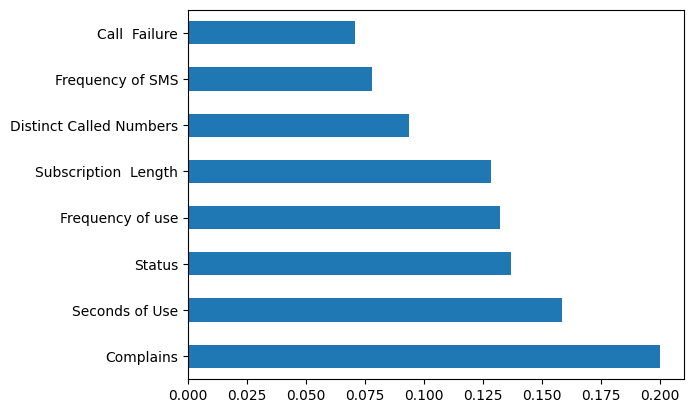

In [10]:
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.show()